# PRJEB48206 - Izquierdo-Lara et al.

Article link: [https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9927792/](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9927792/).

In [1]:
suppressPackageStartupMessages({
    library(provoc)
    library(here)
    library(ggplot2)
    library(lubridate)
})


In [2]:
coco <- read.csv(here("data/processed/PRJEB48206_processed.csv.gz"))
coco$mutation <- parse_mutations(coco$label)
head(coco)


,position,label,mutation,frequency,coverage,count,sra,date,sample_name,avg_spot_len,bases,bioproject,location
,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,1000,+1001.A,ins:1001:1,0,11850,0,ERR7565674,2021-03-03,SAMEA11458556,600,196025400,PRJEB48206,"Rotterdam\, Bergschenhoek"
2,10059,+10060.T,ins:10060:1,0,0,0,ERR7565674,2021-03-03,SAMEA11458556,600,196025400,PRJEB48206,"Rotterdam\, Bergschenhoek"
3,1026,+1027.T,ins:1027:1,0,11825,0,ERR7565674,2021-03-03,SAMEA11458556,600,196025400,PRJEB48206,"Rotterdam\, Bergschenhoek"
4,10386,+10387.T,ins:10387:1,0,0,0,ERR7565674,2021-03-03,SAMEA11458556,600,196025400,PRJEB48206,"Rotterdam\, Bergschenhoek"
5,10605,+10606.T,ins:10606:1,0,0,0,ERR7565674,2021-03-03,SAMEA11458556,600,196025400,PRJEB48206,"Rotterdam\, Bergschenhoek"
6,10664,+10665.T,ins:10665:1,0,0,0,ERR7565674,2021-03-03,SAMEA11458556,600,196025400,PRJEB48206,"Rotterdam\, Bergschenhoek"


In [3]:
lineages_in_paper <- c("B.1.621", "P.1", "B.1.617.2", "B.1.351", "B.1.1.7", "B.1.221", "B.177", "B.1.160")
barcodes <- provoc::usher_barcodes()
available_lineages <- intersect(lineages_in_paper, rownames(barcodes))
barcodes <- filter_lineages(barcodes, available_lineages)
dim(barcodes)


[1]   7 103

In [4]:
system.time(
    res <- provoc(count / coverage ~ .,
        data = coco,
        lineage_defs = barcodes,
        by = "sra")
)
head(res)


   user  system elapsed 
314.205  51.485 392.645 

,rho,ci_low,ci_high,lineage,sra,date,sample_name,avg_spot_len,bases,bioproject,location
,<dbl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,5.748868e-01,NA,NA,B.1.1.7,ERR7565674,2021-03-03,SAMEA11458556,600,196025400,PRJEB48206,"Rotterdam\, Bergschenhoek"
2,4.023137e-05,NA,NA,B.1.621,ERR7565674,2021-03-03,SAMEA11458556,600,196025400,PRJEB48206,"Rotterdam\, Bergschenhoek"
3,1.243667e-01,NA,NA,P.1,ERR7565674,2021-03-03,SAMEA11458556,600,196025400,PRJEB48206,"Rotterdam\, Bergschenhoek"
4,3.238668e-05,NA,NA,B.1.351,ERR7565674,2021-03-03,SAMEA11458556,600,196025400,PRJEB48206,"Rotterdam\, Bergschenhoek"
5,6.424564e-03,NA,NA,B.1.617.2,ERR7565674,2021-03-03,SAMEA11458556,600,196025400,PRJEB48206,"Rotterdam\, Bergschenhoek"
6,4.562403e-09,NA,NA,B.1.160,ERR7565674,2021-03-03,SAMEA11458556,600,196025400,PRJEB48206,"Rotterdam\, Bergschenhoek"


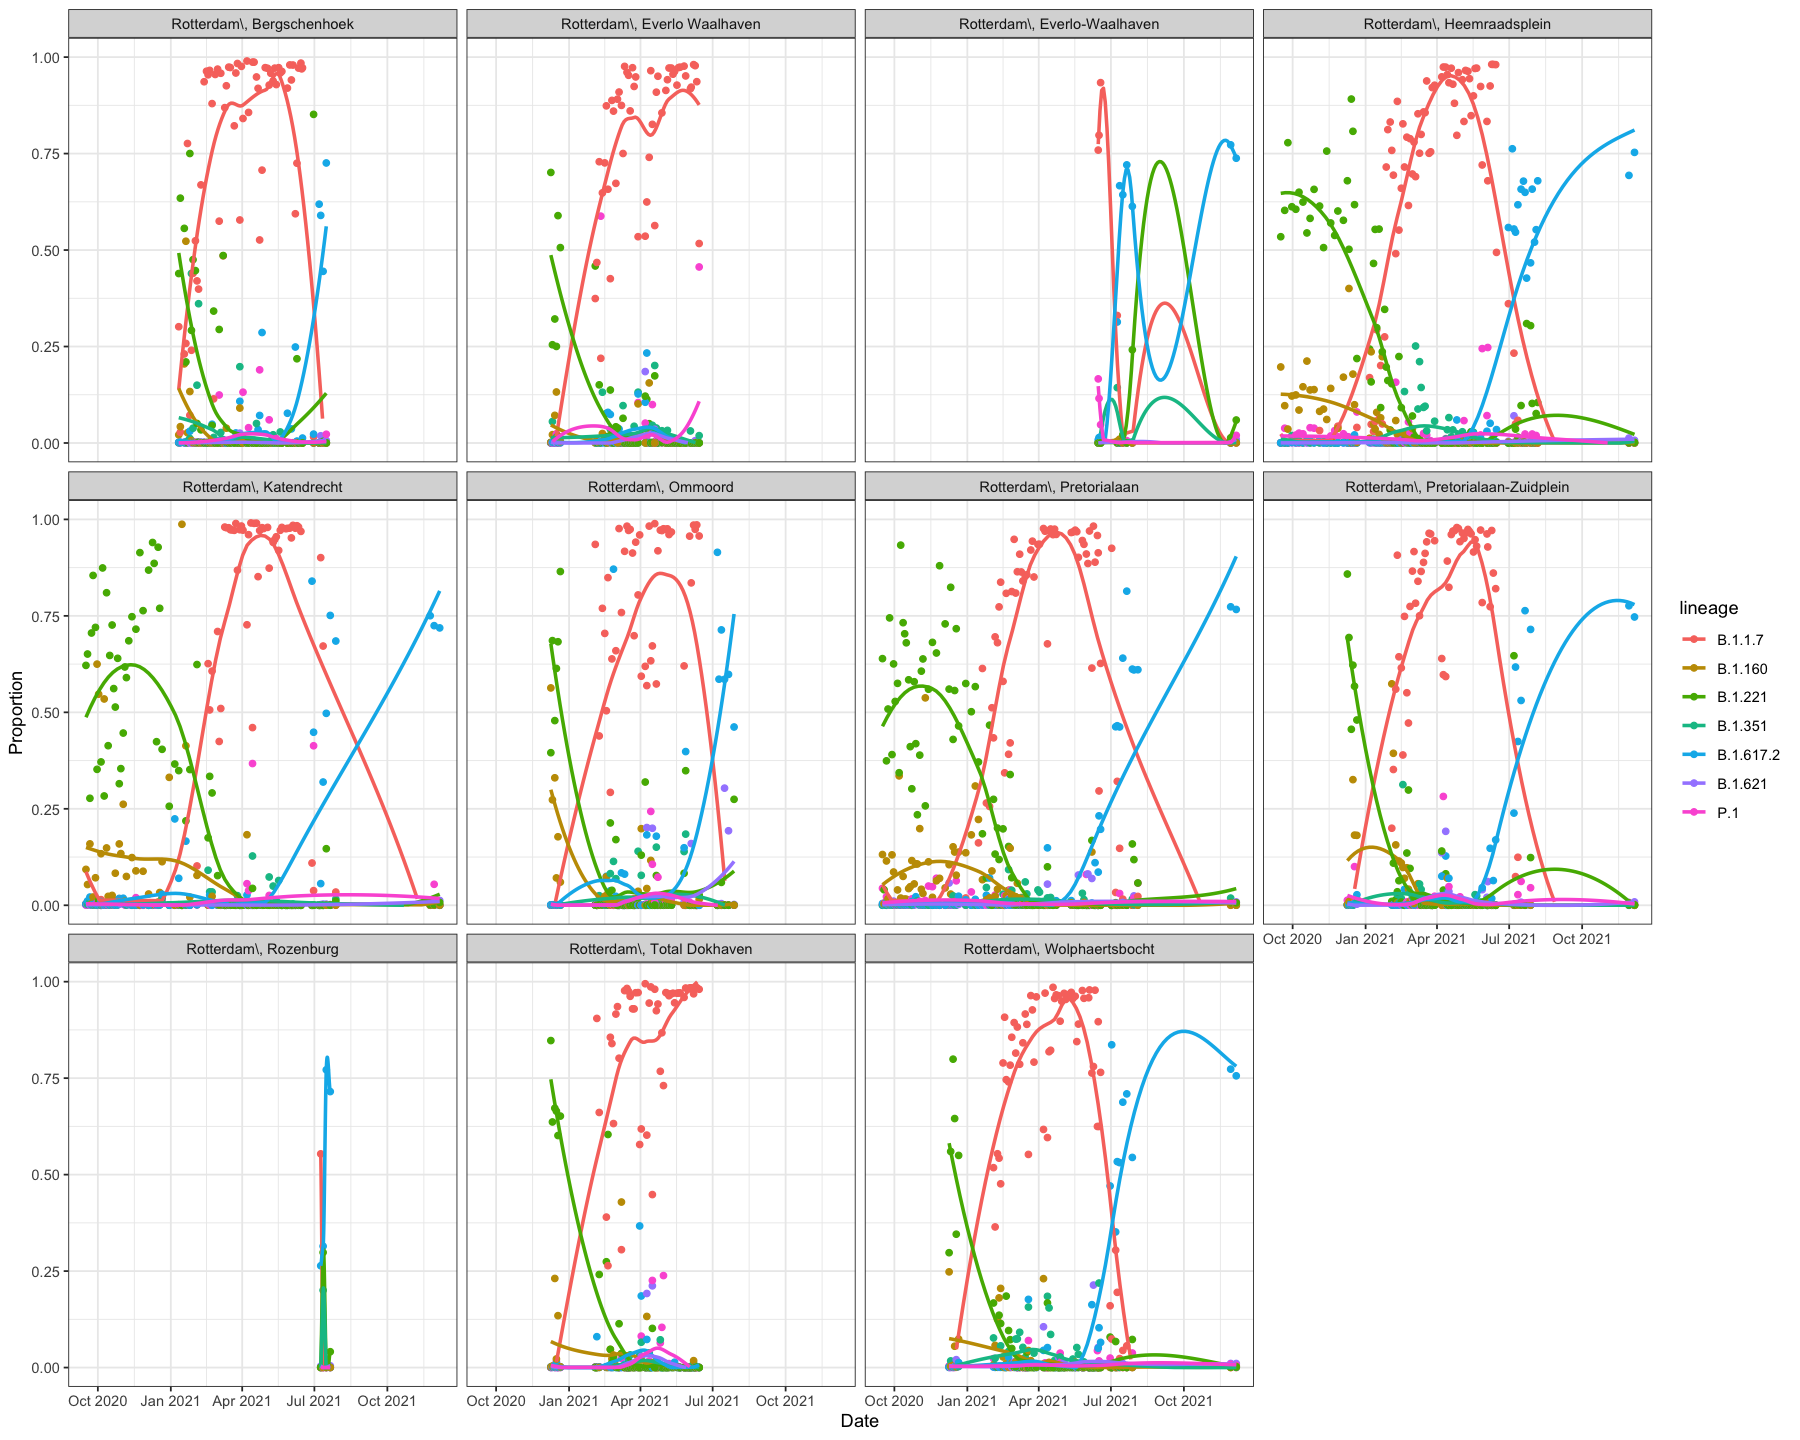

In [5]:
options(repr.plot.width = 15, repr.plot.height = 12)

res$date <- lubridate::ymd(res$date)

# One date failed to parse and looks like it's from 1900s (but no estimate)
res <- res[res$date > ymd("2020-01-01"), ]

gg <- autoplot(res, date_col = "date") + facet_wrap(~location) +
    geom_smooth(formula = y ~ x, se = FALSE, method = "loess") +
    theme_bw()
suppressWarnings(print(gg))
